In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.utils import to_categorical,plot_model

import matplotlib.pyplot as plt
import numpy as np

import warnings
from warnings import filterwarnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
warnings.filterwarnings("ignore",category=FutureWarning)
warnings.filterwarnings("ignore",category=UserWarning)
filterwarnings("ignore")

In [6]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()
#x->pixeller y->çıktılar

In [7]:
x_train.shape

(60000, 28, 28)

In [8]:
y_train.shape

(60000,)

In [10]:
#kaç farklı etiket var
num_labels=len(np.unique(y_train))

In [11]:
num_labels

10

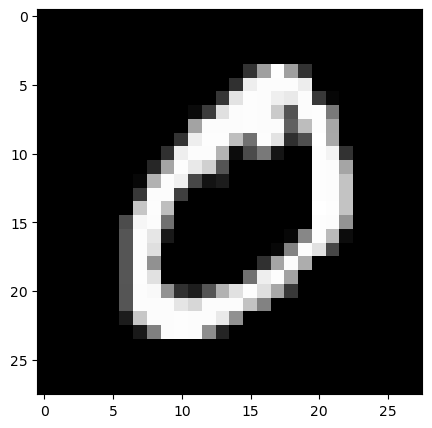

In [28]:
# Veri Setinden Örnekler
plt.figure(figsize=(5,5))
plt.imshow(x_train[1],cmap='gray')

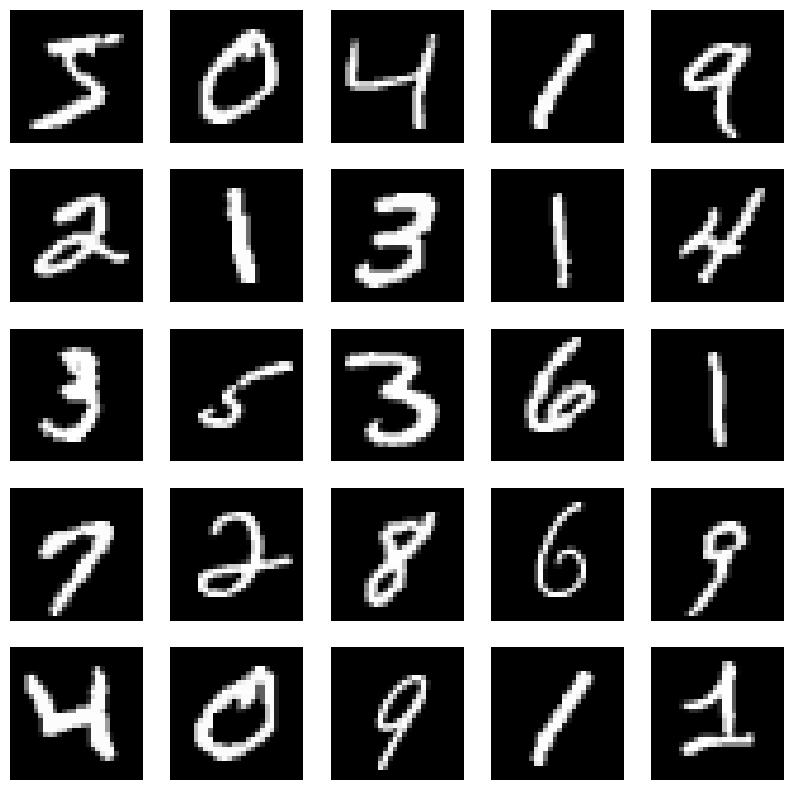

In [26]:
plt.figure(figsize=(10,10))
for n in range(25):
    ax=plt.subplot(5,5,n+1)
    plt.imshow(x_train[n],cmap="gray")
    plt.axis("off")

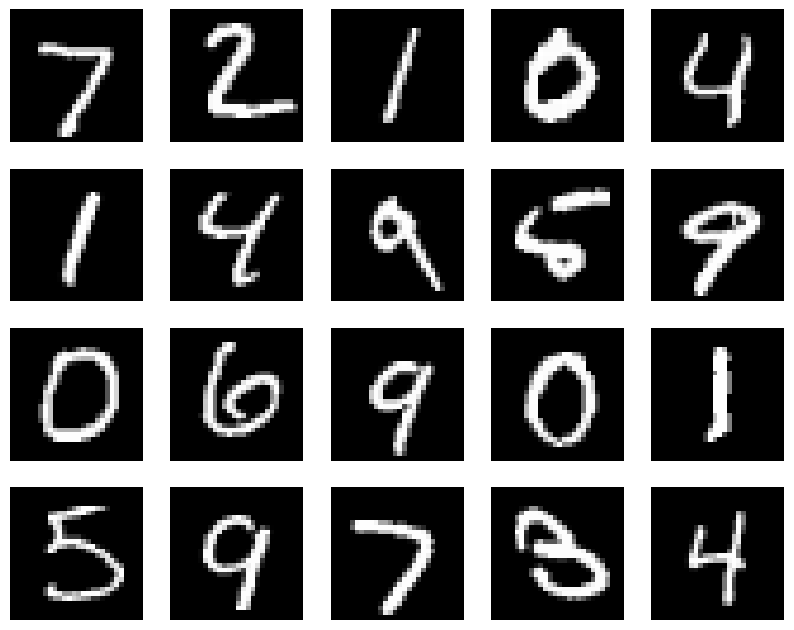

In [27]:
def visuallize_img(data,n):
    plt.figure(figsize=(10,10))
    for i in range(n):
        ax=plt.subplot(5,5,i+1)
        plt.imshow(data[i],cmap='gray')
        plt.axis("off")


visuallize_img(x_test,20)

In [29]:
#RGB(0,255)
#r:250 g:0 b:250 - mor rgb calculater den bak rgb(100,100,100 - gri)
#rgb(255,255,255 - beyaz) rgb(0,0,0 - siyah)

In [30]:
x_train[2]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,  67, 232,  39,   0,   0,   0,
          0,   0],
       [  

In [32]:
x_train[2].shape

(28, 28)

Figure(1000x1000)


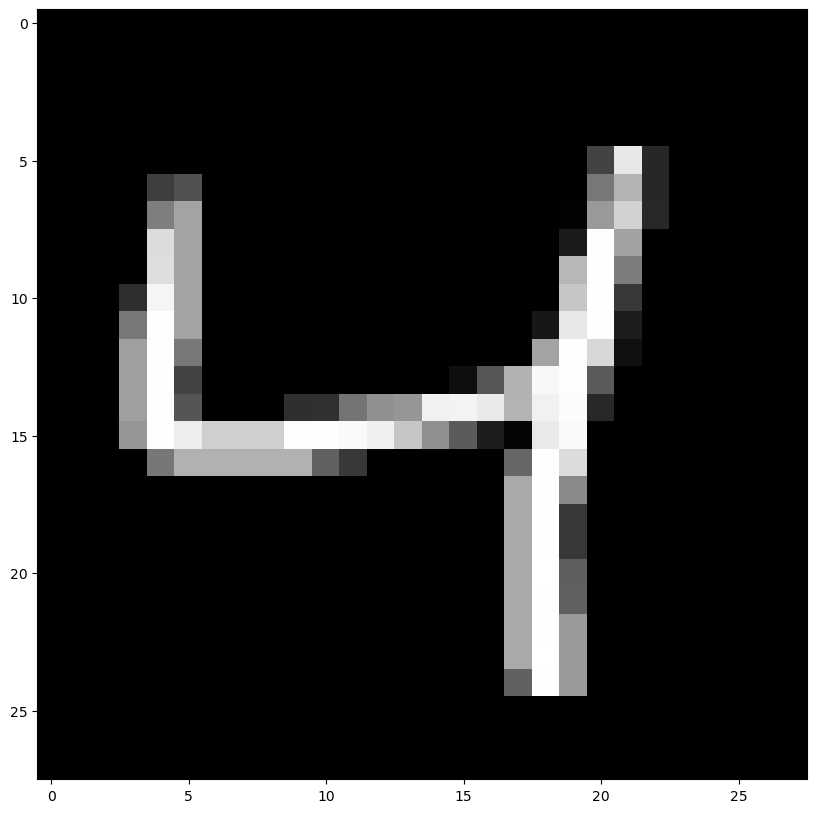

In [37]:
print(plt.figure(figsize=(10,10)))
plt.imshow(x_train[2],cmap="gray")

In [39]:
x_train[2][10,10] #pixel değeri

0

In [41]:
x_train[2].mean()

24.799744897959183

In [46]:
#görseller üzerinde pixwl değerlerini yazma
def pixel_visualize(img):
    fig=plt.figure(figsize=(12,12))
    ax=fig.add_subplot(111)
    ax.imshow(img,cmap='gray')
    width, height=img.shape
    
    treshold=img.max() /2.5
    
    for x in range(width):
        for y in range(height):
            
            ax.annotate(str(round(img[x][y],2)),xy=(y,x),
                       color='white' if img[x][y]<treshold else 'black')
    

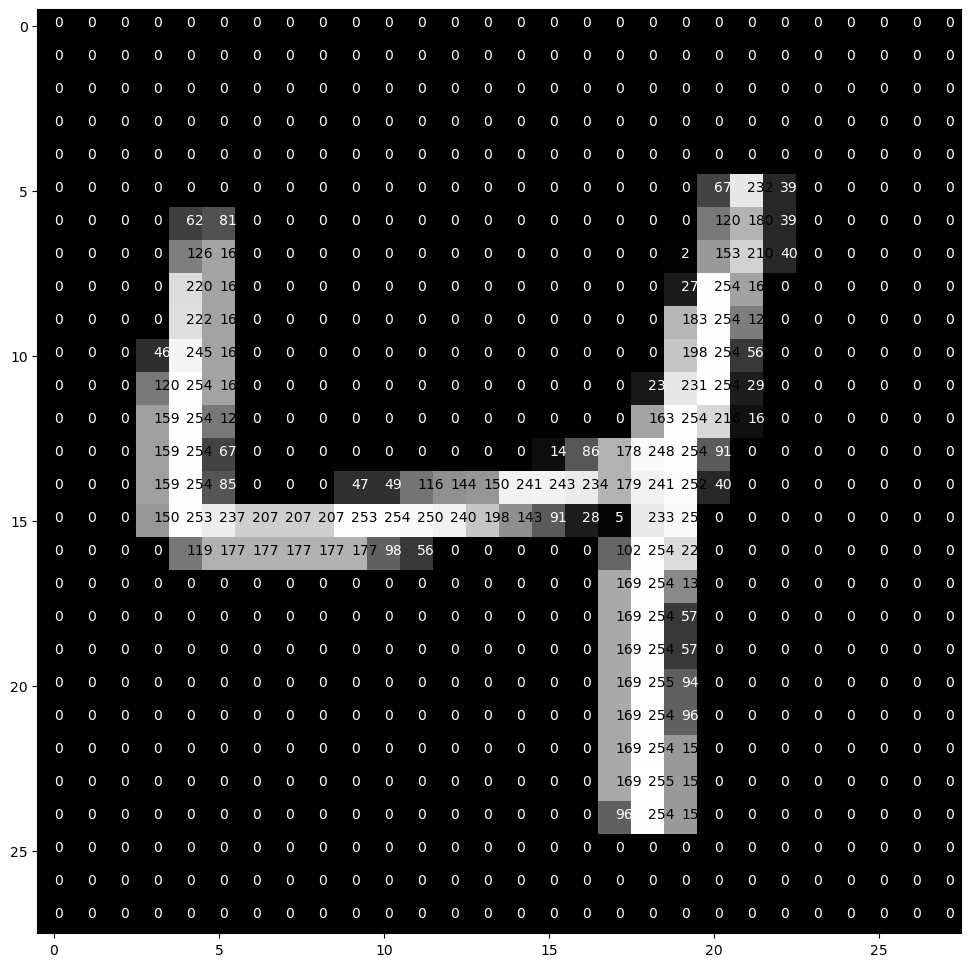

In [47]:
pixel_visualize(x_train[2])

## Data Preparation

#### One Hot Encoding

In [49]:
y_train[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [50]:
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

y_train[0:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [51]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

### Reshaping 
##### elimizde 70000 tane gözlem var ve boyutları 28x28 ve 784 tane pixel den oluşmakta işte bu her pixel pixel içerisinde bulunan (0,255) arasındaki değeride aktarmamız gerekiyor.

In [52]:
x_train.shape[1]

28

In [53]:
print(f"x_train boyutu : {x_train.shape}")
print(f"x_test boyutu : {x_test.shape}")

x_train boyutu : (60000, 28, 28)
x_test boyutu : (10000, 28, 28)


In [56]:
x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_test=x_test.reshape(x_test.shape[0],28,28,1)

print(f"x_train boyutu : {x_train.shape}")
print(f"x_test boyutu : {x_test.shape}")
#1 ifadesi o görsellerdeki pixel bilgisini tutmaktadır

x_train boyutu : (60000, 28, 28, 1)
x_test boyutu : (10000, 28, 28, 1)


### Standardization
##### pixel değerlerini 0-1 arasında değerler vereceğiz

In [57]:
x_train=x_train.astype('float32') / 255
x_test=x_test.astype('float32') / 255

### Modeling

##### modelin yapısını tanımlama

In [64]:
#modelin dış özellikleri
#Sequnatial - sıralı katmanlardan oluşacağını belirtir
#flatten katmanı ilk katman burada 28,28,1 verilerimize göre şekillendirdik
model=tf.keras.Sequential([
    #input layer
    Flatten(input_shape=(28,28,1),name='input_layer'),
    #hidden layer 128 nörondan oluşmakta
    Dense(units=128,activation='relu',name='hidden_layer'),
    #output layer
    Dense(units=num_labels,activation='softmax',name='output_layer')])


#modelin iç özellikleri
#loss-hata değerlendirme metriğidir amaç bu fonksiyonu  minimize etmektir
#burada çok sınıflı(10) bir sınıflandırma problemi old. için categprical_crossentropy kullandık bu optimize edilmesi gereken kayıp fonksiyonu ifade eder
#burada loss fonksiyonunu minimize edecek olan optimizasyon fonksiyonu 'adam' olacaktır . gradient descent falanda olabilirdi
#burada loss fonksiyonunu minimize ederken gidiş yönünü hata metrikleri ile belirleyeceğiz
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=[tf.keras.metrics.Precision(),tf.keras.metrics.Recall(),"accuracy"])

In [66]:
model.summary()
#çıkıştaki 1290 değeri hiden layer nöron sayısı * output layer nöron sayısı + 10(bias değeri)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (Flatten)           │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer (Dense)            │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [68]:
#batch size her iterasyon rastgele 128 gözlem birime bakılarak ağırlık güncelemeleri gerçekleştirir
model.fit(x_train,y_train,epochs=10,batch_size=128,validation_data=(x_test,y_test))

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9824 - loss: 0.0626 - precision_3: 0.9859 - recall_3: 0.9793 - val_accuracy: 0.9755 - val_loss: 0.0815 - val_precision_3: 0.9791 - val_recall_3: 0.9722
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9852 - loss: 0.0529 - precision_3: 0.9881 - recall_3: 0.9826 - val_accuracy: 0.9753 - val_loss: 0.0778 - val_precision_3: 0.9785 - val_recall_3: 0.9735
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9884 - loss: 0.0418 - precision_3: 0.9904 - recall_3: 0.9863 - val_accuracy: 0.9741 - val_loss: 0.0808 - val_precision_3: 0.9780 - val_recall_3: 0.9717
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9904 - loss: 0.0362 - precision_3: 0.9924 - recall_3: 0.9884 - val_accuracy: 0.9786 - val_loss: 0.0651 - val_precision_3: 0.9816 - val_recall_3: 0.9766
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9924 - loss: 0.0301 - precision_3: 0.9938 - recall_3: 0.9910 -

## Evaluation

In [70]:
history=model.fit(x_train,y_train,epochs=10,batch_size=128,validation_data=(x_test,y_test))

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9980 - loss: 0.0103 - precision_3: 0.9982 - recall_3: 0.9978 - val_accuracy: 0.9768 - val_loss: 0.0740 - val_precision_3: 0.9789 - val_recall_3: 0.9756
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9981 - loss: 0.0095 - precision_3: 0.9983 - recall_3: 0.9980 - val_accuracy: 0.9790 - val_loss: 0.0750 - val_precision_3: 0.9805 - val_recall_3: 0.9778
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9982 - loss: 0.0088 - precision_3: 0.9985 - recall_3: 0.9981 - val_accuracy: 0.9790 - val_loss: 0.0736 - val_precision_3: 0.9807 - val_recall_3: 0.9779
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9991 - loss: 0.0061 - precision_3: 0.9992 - recall_3: 0.9990 - val_accuracy: 0.9780 - val_loss: 0.0762 - val_precision_3: 0.9796 - val_recall_3: 0.9774
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9992 - loss: 0.0059 - precision_3: 0.9994 - recall_3: 0.9991 -

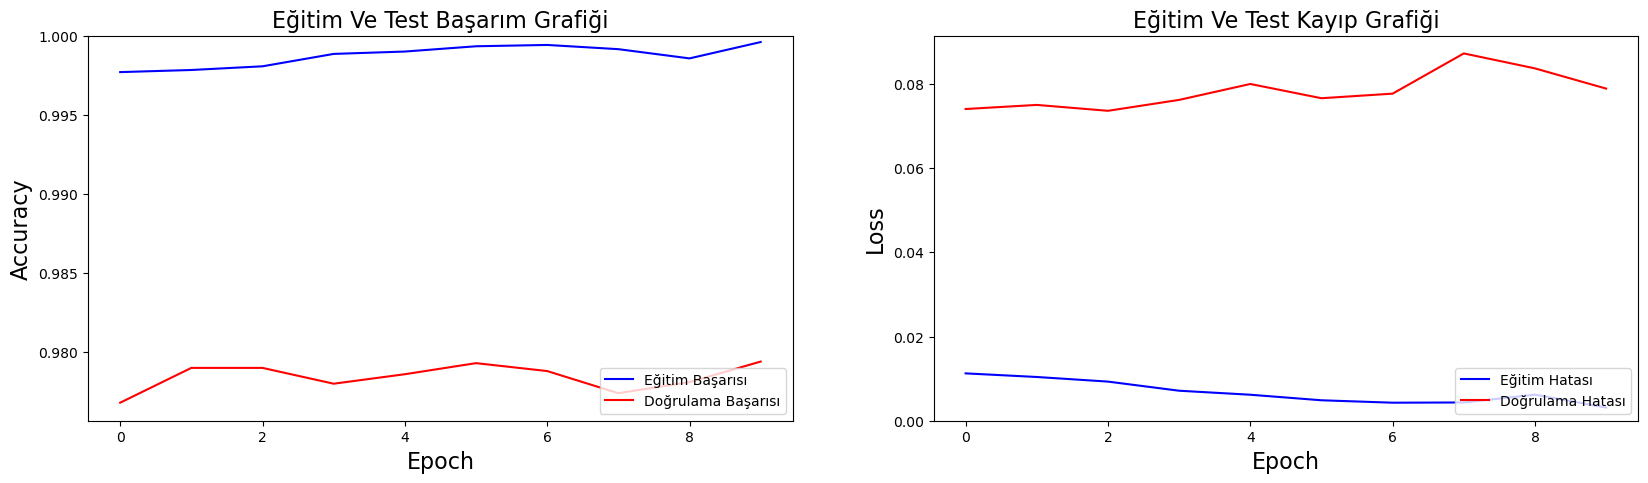

In [77]:
#------------------------Grafik 1 Accuracy-------------------------
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],color='b',label='Eğitim Başarısı')
plt.plot(history.history['val_accuracy'],color='r',label='Doğrulama Başarısı')
plt.legend(loc='lower right')
plt.xlabel('Epoch',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.ylim([min(plt.ylim()),1])
plt.title('Eğitim Ve Test Başarım Grafiği',fontsize=16)

#------------------------Grafik 2 loss-----------------------------
plt.subplot(1,2,2)
plt.plot(history.history['loss'],color='b',label='Eğitim Hatası')
plt.plot(history.history['val_loss'],color='r',label='Doğrulama Hatası')
plt.legend(loc='lower right')
plt.xlabel('Epoch',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.ylim([0,max(plt.ylim())])
plt.title('Eğitim Ve Test Kayıp Grafiği',fontsize=16)
plt.show()

In [78]:
loss, precision, recall, acc =model.evaluate(x_test,y_test,verbose=False)
print(100*acc)
print(100,loss)
print(100*precision)
print(100*recall)

97.93999791145325
100 0.07888481765985489
98.04707169532776
97.89999723434448


#### precision : model aracılığıyla örneğin 10 tane sınıfımız var bu sınıflarımız arasından örneğin 1 sınıfının ne kadarının gerçek old. tahmin eder. Yani tahmin ettiklerimizin başarısıdır
#### recall : sınıflarımızın gerçek değerlerini kaç tanesinin doğru tahmin ettiğini ifade eder
#### precision-recall-accuracy değerlerinin birbirlerine yakın olması başarılı bir sınıflandırma işlemi yaptığımızı söyler

## Tahmin

In [80]:
# modeli kaydetme
model.save('mnist_model.h5')

In [94]:
import random

random=random.randint(0,x_test.shape[0])
random

5940

In [95]:
test_img=x_test[random]

In [96]:
y_test[random]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.])

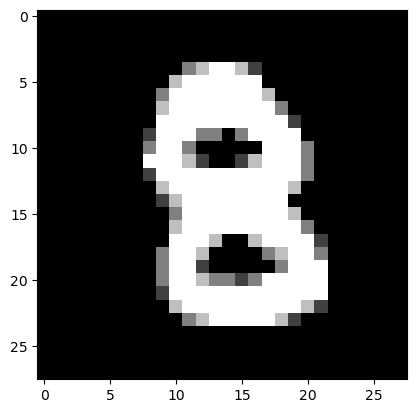

In [97]:
plt.imshow(test_img.reshape(28,28),cmap='gray')

In [98]:
test_data=x_test[random].reshape(1,28,28,1)

In [99]:
probability=model.predict(test_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [100]:
probability

array([[2.2152482e-09, 5.2652227e-20, 9.9923370e-10, 2.2705275e-07,
        3.2655651e-18, 3.1321500e-13, 1.1043079e-12, 2.4996836e-17,
        9.9999321e-01, 6.5435111e-06]], dtype=float32)

In [101]:
predicted_classes=np.argmax(probability)

In [102]:
predicted_classes

8